In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/CSSEGISandData_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [4]:
dfcountries = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum().transpose()

In [5]:
dfcountries.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
1/26/20,0,0,0,0,0,0,0,4,0,0,...,0,5,0,0,0,0,0,0,2,0


In [6]:
countries = df['Country/Region'].unique()
countries

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [7]:
len(countries)

152

In [8]:
selected_countries = ['Italy', 'Iran', 'US', 'China',
             'United Kingdom', 'Portugal', 'Korea, South',
             'Germany', 'France']

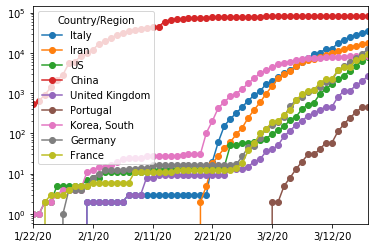

In [9]:
dfcountries[selected_countries].plot(style='o-', logy=True)

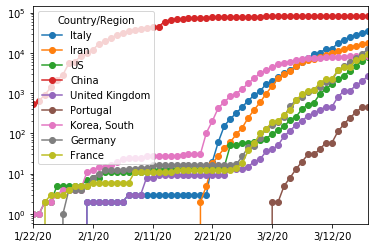

In [10]:
dfcountries[selected_countries].plot(style='o-', logy=True)

In [11]:
len(dfcountries)

57

/Users/fra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


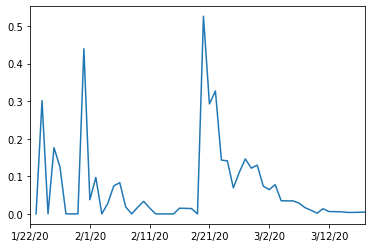

In [12]:
np.log10(dfcountries)['Korea, South'].diff().plot()

/Users/fra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


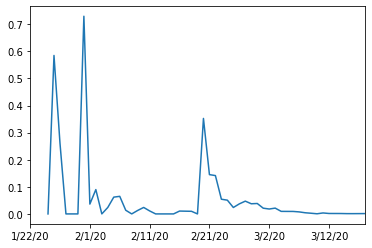

In [13]:
np.log10(dfcountries)['Korea, South'].pct_change().plot()

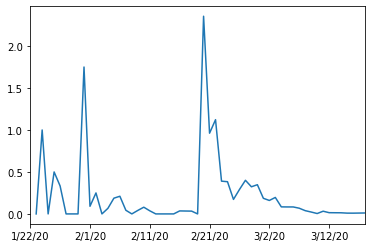

In [14]:
dfcountries['Korea, South'].pct_change().plot()

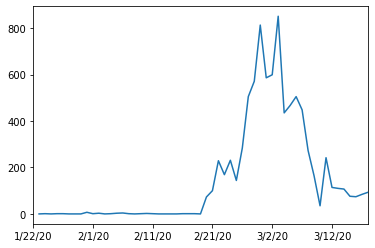

In [15]:
dfcountries['Korea, South'].diff().plot()

/Users/fra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/fra/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


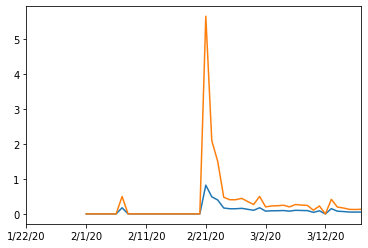

In [16]:
np.log10(dfcountries)['Italy'].diff().plot()
dfcountries['Italy'].pct_change().plot()

In [17]:
len(selected_countries)

9

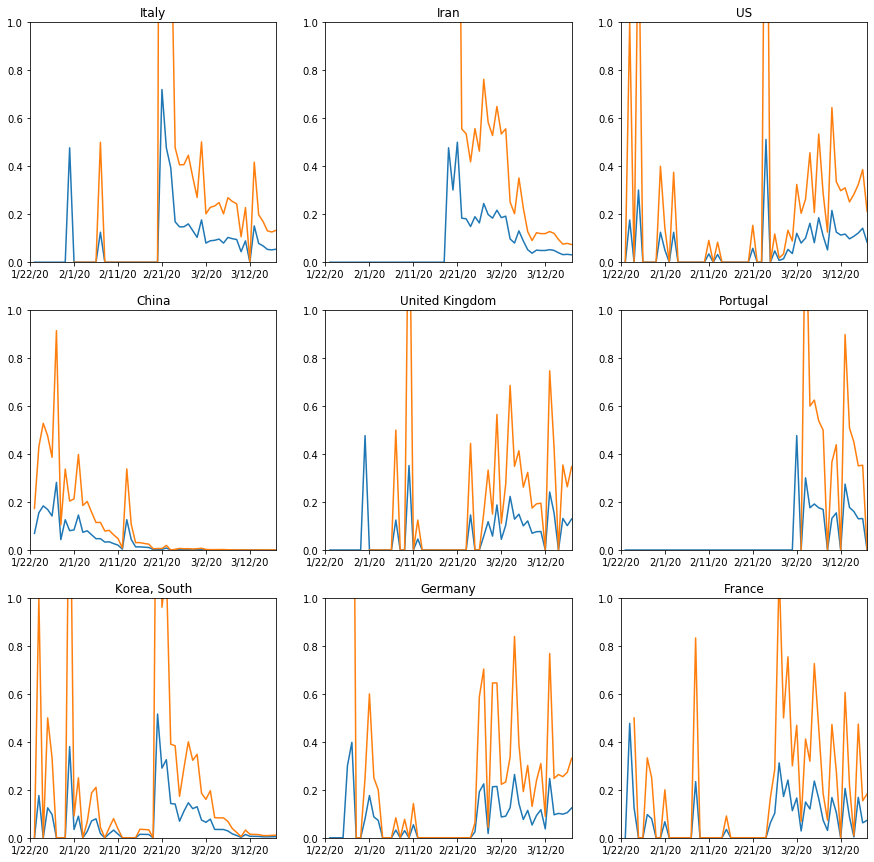

In [18]:
plt.figure(figsize=(15, 15))
i = 1
for country in selected_countries:
    plt.subplot(3, 3, i)
    np.log10(dfcountries+1)[country].diff().plot();
    dfcountries[country].pct_change().plot();
    plt.title(country)
    plt.ylim(0,1)
    i = i+1

In [19]:
total_cases = dfcountries.tail(1).transpose().iloc[:, 0].sort_values(ascending=False)
top_countries = total_cases.head(16)
top_countries

Country/Region
China             81102
Italy             35713
Iran              17361
Spain             13910
Germany           12327
France             9105
Korea, South       8413
US                 7783
Switzerland        3028
United Kingdom     2642
Netherlands        2058
Austria            1646
Norway             1550
Belgium            1486
Sweden             1279
Denmark            1115
Name: 3/18/20, dtype: int64

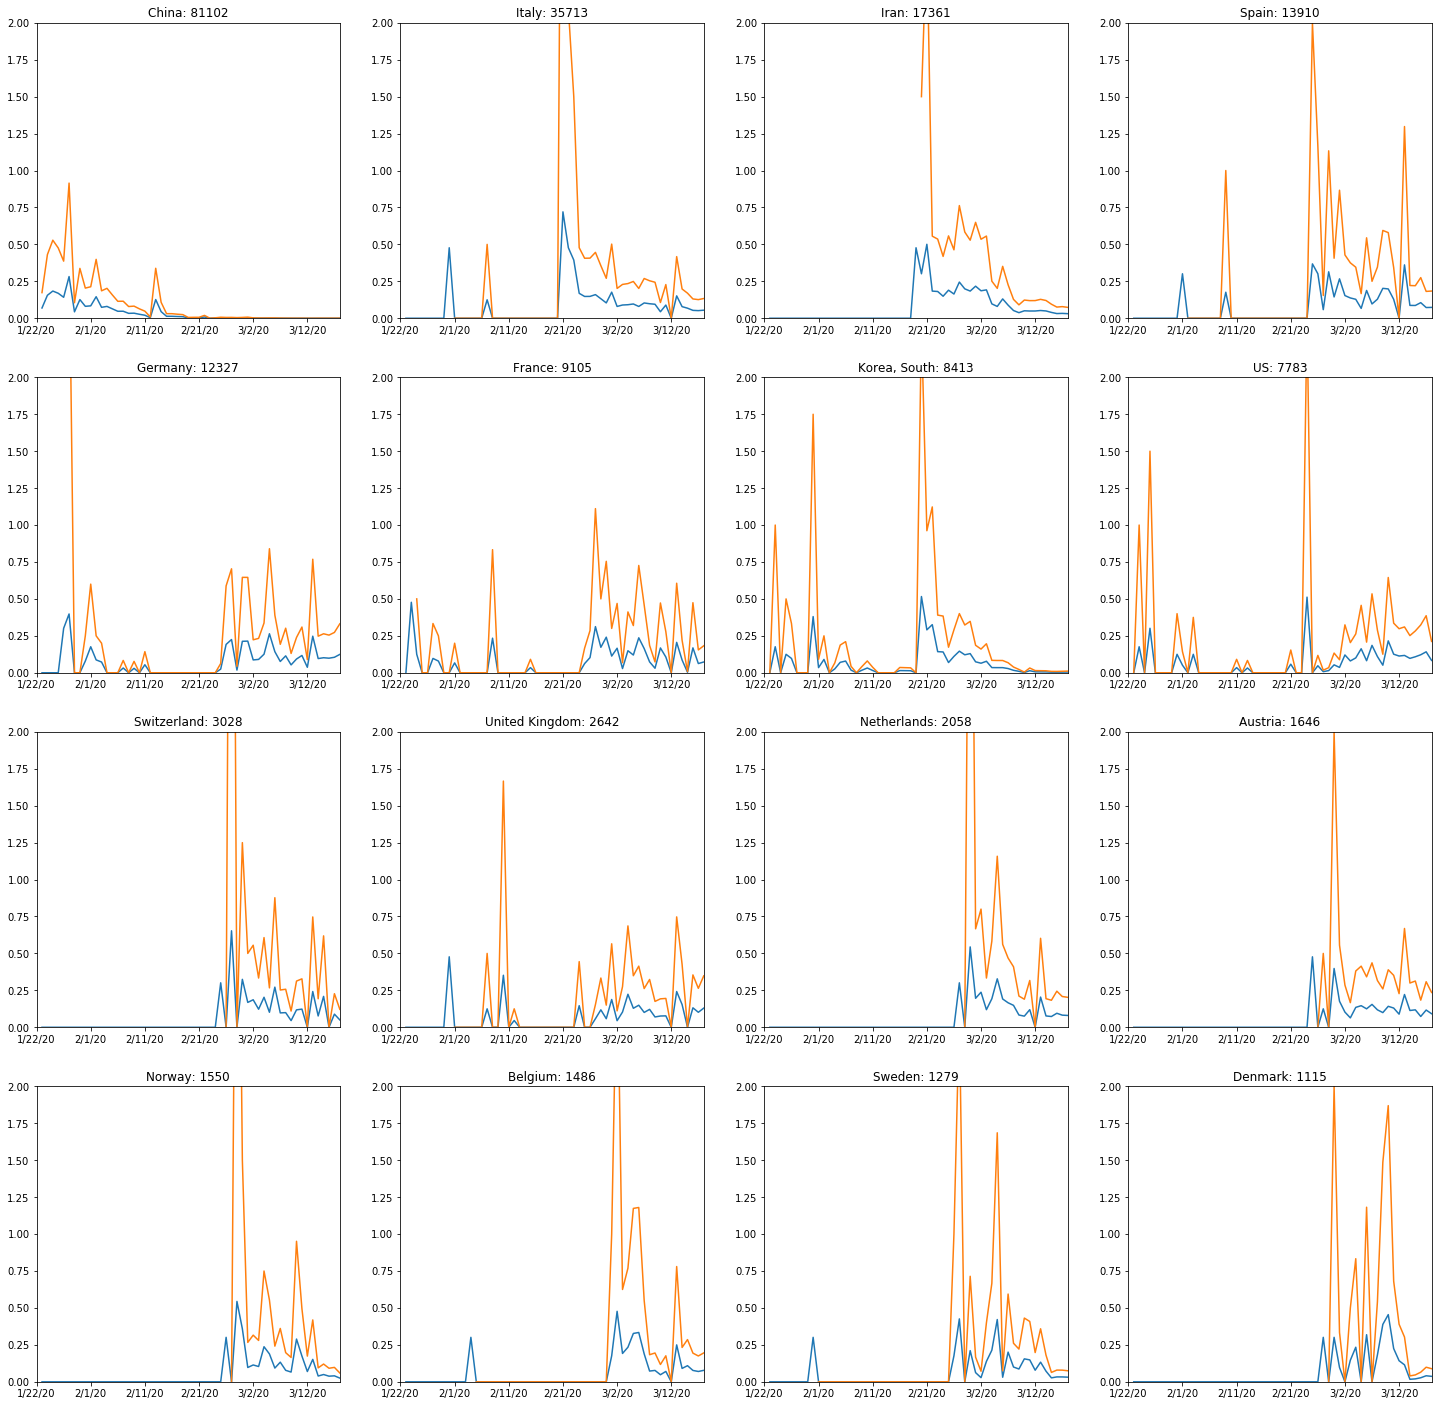

In [20]:
plt.figure(figsize=(25, 25))
i = 1
for country, count in zip(top_countries.index, top_countries.values):
    plt.subplot(4, 4, i)
    np.log10(dfcountries+1)[country].diff().plot();
    dfcountries[country].pct_change().plot();
    plt.title(f"{country}: {count}")
    plt.ylim(0,2)
    i = i+1

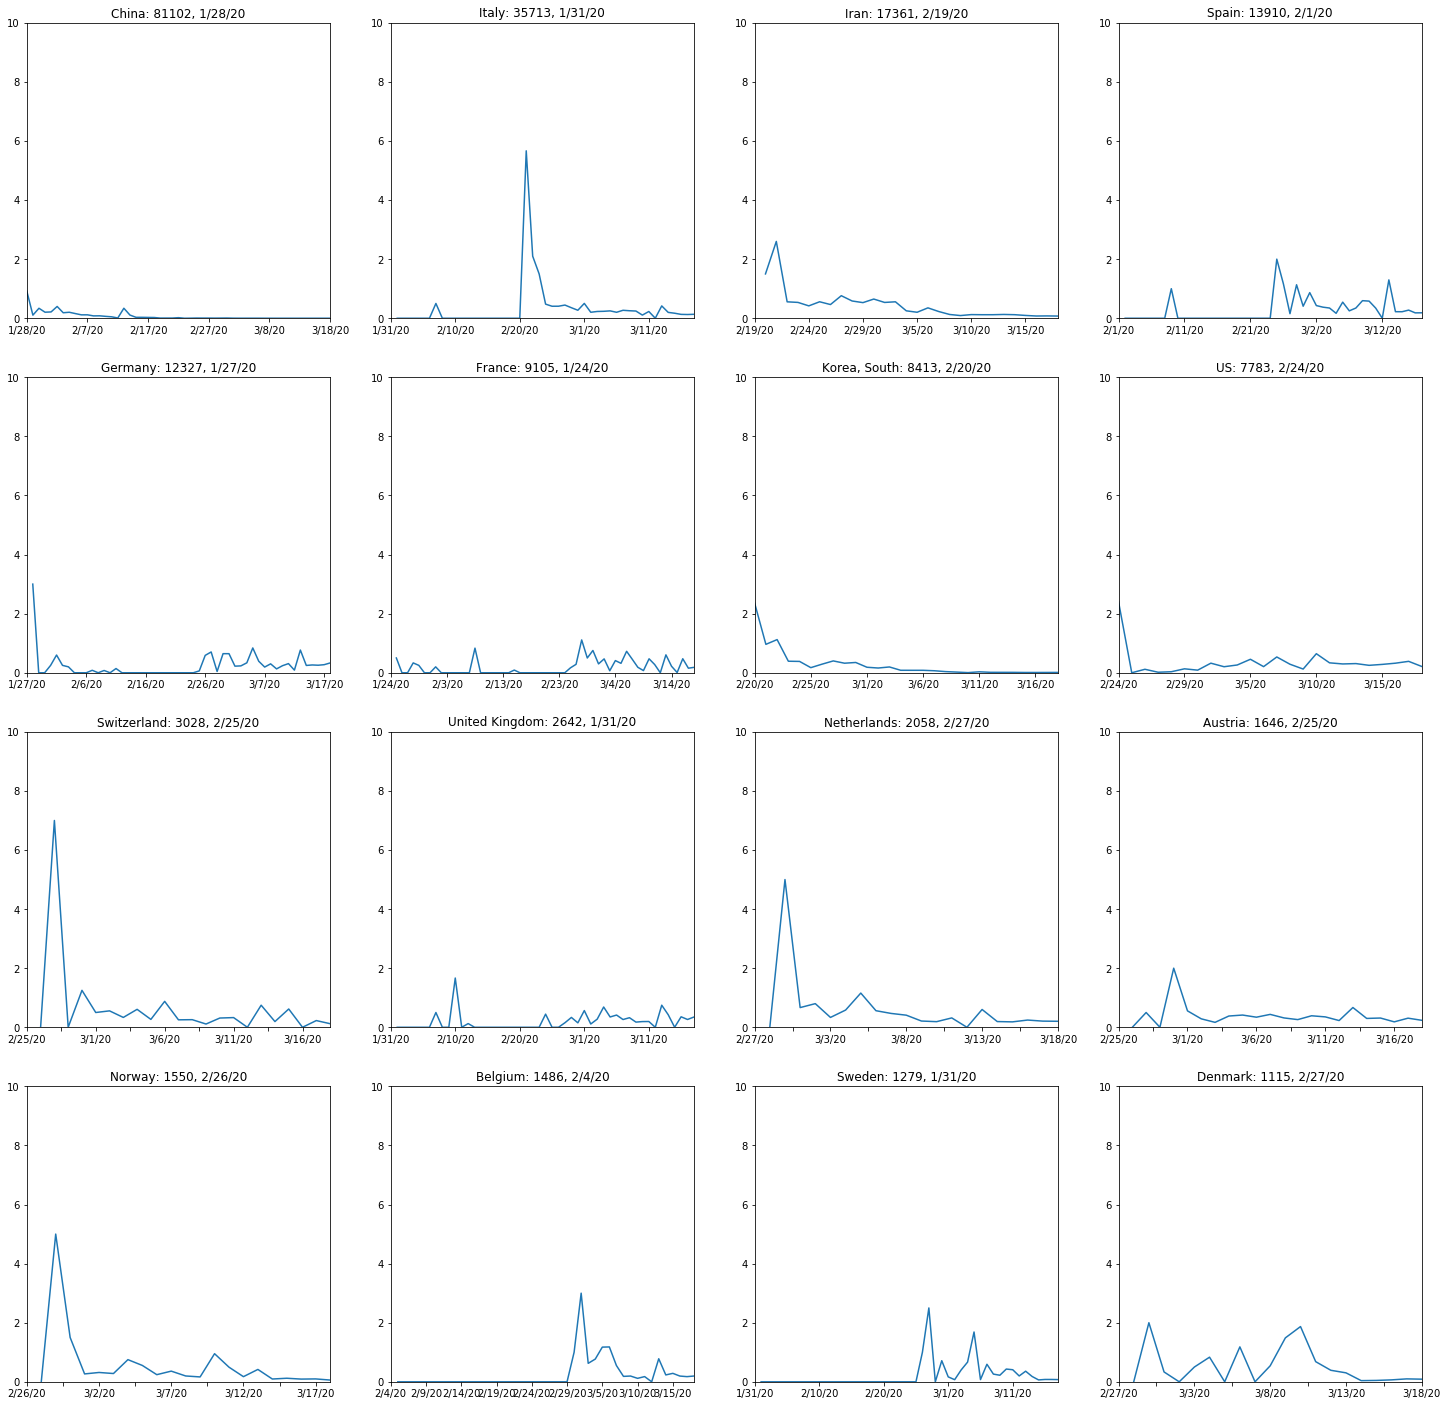

In [21]:
plt.figure(figsize=(25, 25))
i = 1
for country, count in zip(top_countries.index, top_countries.values):
    plt.subplot(4, 4, i)
    idxmax = dfcountries[country].pct_change().idxmax()
    dfcountries[country].pct_change().loc[idxmax:].plot();
    plt.title(f"{country}: {count}, {idxmax}")
    plt.ylim(0,10)
    i = i+1